In [2]:
import pandas as pd

In [3]:
"""
data.get_dummies()
"""

'\ndata.get_dummies()\n'

In [4]:
# On importe le fichier csv

data = pd.read_csv('/Users/messie/Desktop/GSAF5.csv', encoding="ISO-8859-1")

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [5]:
data.shape[0]

5992

In [6]:
# On change le nom des colonnes

data.rename({'Name': 'Victim', 'Sex ': 'Sex', 'Species ': 'Species', 
             'pdf': 'Case\'s PDF', 'href': 'Downloading link'}, axis=1, inplace=True)

data.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Victim,Sex,...,Species,Investigator or Source,Case's PDF,href formula,Downloading link,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN


In [7]:
set(data['Sex'])


data['Sex'] = data['Sex'].str.replace('N', 'UNKNOWN').str.replace('lli', 'UNKNOWN').str.replace('M ', 'UNKNOWN').str.replace('.', 'UNKNOWN')

set(data['Sex'])


{'F', 'M', 'UNKNOWN', nan}

In [8]:
# On regarde le nombre de données nulles dans chaque col

data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Victim                     200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
Case's PDF                   0
href formula                 1
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [9]:
# On enlève les cols qui ont trop peu de données / inutiles

"""
null_cols = data.isnull().sum()
drop_cols = list(null_cols[null_cols>25000].index)
data = data.drop(drop_cols, axis=1)
"""

data = data.drop(['Case Number.1', 'Case Number.2', 
                  'href formula', 'original order', 'Unnamed: 22', 'Unnamed: 23'], axis=1)
data = data.drop_duplicates()

data.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Victim,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case's PDF,Downloading link
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [10]:
# On supprime les "male"/"female" dans 'Name'


data['Victim'] = data['Victim'].str.replace('female', 'UNKNOWN').str.replace('male', 'UNKNOWN')

data.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Victim,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case's PDF,Downloading link
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,UNKNOWN,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [11]:
# On indique dans les cases vides qu'on n'a pas d'informations

data = data.fillna('UNKNOWN')

In [12]:
data.isnull().sum()

Case Number               0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Victim                    0
Sex                       0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
Case's PDF                0
dtype: int64

In [13]:
data.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Victim                    object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
Case's PDF                object
dtype: object

In [14]:
# ANALYSE DES DONNÉES
print(set(data['Type']))


{'Invalid', 'Unprovoked', 'Sea Disaster', 'Boat', 'Provoked', 'Boating'}


In [15]:
# Nombre d'attaques

#print(set(data['Type']))

unprov = data[(data['Type']=='Unprovoked')]
prov = data[(data['Type']=='Provoked')]
sea = data[(data['Type']=='Sea Disaster')]
boat = data[(data['Type']=='Boating')] + data[(data['Type']=='Boat')]
inva = data[(data['Type']=='Invalid')]

attacks = [[unprov.shape[0], prov.shape[0], sea.shape[0], boat.shape[0], inva.shape[0], data.shape[0]]]
cols = ['Unprovocked', 'Provocked', 'Sea Disaster', 'Boat accident', 'Invalid data', 'Total']


pd.DataFrame(attacks, columns=cols, index=['Attacks'])

,Unprovocked,Provocked,Sea Disaster,Boat accident,Invalid data,Total
Attacks,4386,557,220,310,519,5992


In [16]:
# Sexe des victimes

female = data[(data['Sex']=='F')]
male = data[(data['Sex']=='M')]
unkn = data[(data['Sex']=='UNKNOWN')]

sex = [[female.shape[0], male.shape[0], unkn.shape[0], data.shape[0]]]
cols = ['Female', 'Male', 'Unknown', 'Total']

pd.DataFrame(sex, columns=cols, index=['Victims'])

,Female,Male,Unknown,Total
Victims,585,4835,572,5992


In [17]:
# Accidents en France

fr = data[(data['Country']=='FRANCE')]

pd.DataFrame([[fr.shape[0], data.shape[0]]], columns=['France', 'Other'], index=['Attacks'])

,France,Other
Attacks,13,5992


In [18]:
data['Fatal (Y/N)'] = data['Fatal (Y/N)'].str.replace(' N', 'N').str.replace('N ', 'N').str.replace('n', 'N').str.replace('F', 'Y').str.replace('#VALUE!', 'UNKNOWN')

set(data['Fatal (Y/N)'])

fatal = data[(data['Fatal (Y/N)']=='Y')]
not_fat = data[(data['Fatal (Y/N)']=='N')]
unkn = data[(data['Fatal (Y/N)']=='UNKNOWN')]

pd.DataFrame([[fatal.shape[0], not_fat.shape[0], unkn.shape[0], data.shape[0]]], 
             columns=['Fatal', 'Not fatal', 'Unknown', 'Total'], index=['Attacks'])



,Fatal,Not fatal,Unknown,Total
Attacks,1553,4325,114,5992


In [19]:
# Nettoyage de data['Age']

data['Age'] = data['Age'].str.replace('&', '')
data['Age'] = data['Age'].str.replace('mid-', '')
data['Age'] = data['Age'].str.replace('\'', '')
data['Age'] = data['Age'].str.replace('s', '')
data['Age'] = data['Age'].str.replace('>', '')
data['Age'] = data['Age'].str.replace('\xa0', 'UNKNOWN')
data['Age'] = data['Age'].str.replace(' month', '')
data['Age'] = data['Age'].str.replace('teen', '15')
data['Age'] = data['Age'].str.replace('A.M.', 'UNKNOWN')
data['Age'] = data['Age'].str.replace('(', '')
data['Age'] = data['Age'].str.replace(')', '')
data['Age'] = data['Age'].str.replace(',', '  ')
data['Age'] = data['Age'].str.replace('adult', '')
data['Age'] = data['Age'].str.replace('middle-age', '50')
data['Age'] = data['Age'].str.replace('?', '')
data['Age'] = data['Age'].str.replace('\"', '')
data['Age'] = data['Age'].str.replace('or', '')
data['Age'] = data['Age'].str.replace('to', '')
data['Age'] = data['Age'].str.replace('young', '30')
data['Age'] = data['Age'].str.replace('Both', '')
data['Age'] = data['Age'].str.replace('MAKE LINE GREEN', 'UNKNOWN')
data['Age'] = data['Age'].str.replace('Elderly', '50')
data['Age'] = data['Age'].str.replace('X', 'UNKNOWN')
data['Age'] = data['Age'].str.replace('Teen', '15')
data['Age'] = data['Age'].str.replace('½', '')
data['Age'] = data['Age'].str.replace('UNKNOWN ', 'UNKNOWN')
data['Age'] = data['Age'].str.replace('Ca. ', '')
data['Age'] = data['Age'].str.replace('F', 'UNKNOWN')
data['Age'] = data['Age'].str.replace('M', 'UNKNOWN')



set(data['Age'])


{'',
 ' ',
 '  ',
 '       14',
 '  19',
 ' 11',
 '1',
 '10',
 '10  12',
 '11',
 '12',
 '12  13',
 '13',
 '13  14',
 '13  18',
 '14',
 '15',
 '16',
 '16  18',
 '17',
 '17  16',
 '17  35',
 '18',
 '18  20',
 '18  22',
 '19',
 '2',
 '2  3',
 '20',
 '21',
 '21  ',
 '21   34  24  35',
 '21  26',
 '22',
 '23',
 '23  20',
 '23  26',
 '24',
 '25',
 '25  28',
 '25  35',
 '26',
 '27',
 '28',
 '28   23  30',
 '28  26',
 '29',
 '3',
 '30',
 '30  32',
 '30  36',
 '31',
 '31  33',
 '32',
 '32  30',
 '33',
 '33  26',
 '33  37',
 '34',
 '34  19',
 '35',
 '36',
 '36  23',
 '36  26',
 '37',
 '37   67   35   27      27',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '46  34',
 '47',
 '48',
 '49',
 '5',
 '50',
 '50  30',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '7          31',
 '7  8',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '77',
 '78',
 '8',
 '8  10',
 '81',
 '84',
 '86',
 '87'

In [20]:
ages= []

for col in data.index:
    a = str(data.at[col,'Age'])
    ages.append(a)
    
len(ages) == data.shape[0]
#ages

True

In [21]:
# Fonction pour calculer une moyenne d'âge lorsqu'on en a plusieurs (test)

character = ['34 45', '21 30', 'UNKNOWN', '7']
final = []

tampon = []
meann = []

for i in character:
    if i=="UNKNOWN":
        final.append(i)
        continue
    if i=="":
        final.append(i)
        continue
    for char in i:
        if char.isdigit():
            age = char
            tampon.append(age)
        elif char==" ":
            str1 = ''.join(tampon)
            str2 = int(str1)
            meann.append(str2)
            age = 0
            tampon = []
        if char == i[-1] and char.isdigit():
            str1 = ''.join(tampon)
            str2 = int(str1)
            meann.append(str2)
            age = 0
            tampon = []
    # C'est ici que je vais faire la moyenne d'âge pour chaque "groupe" :
    age_moyen = str(int(sum(meann) / len(meann)))
    meann = []
    final.append(age_moyen)
    age = 0
    tampon = []
        

        
print("Résultat des âges moyens : ", final)

Résultat des âges moyens :  ['39', '25', 'UNKNOWN', '7']


In [22]:
final = []

tampon = []
meann = []

for i in ages:
    if i=="UNKNOWN":
        final.append(i)
        continue
    for char in i:
        if char.isdigit():
            age = char
            tampon.append(age)
        elif char==" ":
            str1 = char.join(tampon)
            if str1.isdigit():
                str2 = int(str1)
            meann.append(str2)
            age = 0
            tampon = []
        if char == i[-1] and char.isdigit():
            str1 = ''.join(tampon)
            str2 = int(str1)
            meann.append(str2)
            age = 0
            tampon = []
    # C'est ici que je vais faire la moyenne d'âge pour chaque "groupe" :
    if len(meann)!=0:
        age_moyen = str(int(sum(meann) / len(meann)))
    meann = []
    final.append(age_moyen)
    age = 0
    tampon = []
        

        
print("Résultat des âges moyens : ", final)



Résultat des âges moyens :  ['16', '36', '43', 'UNKNOWN', 'UNKNOWN', 'UNKNOWN', '60', '51', '50', '12', 'UNKNOWN', '9', '2', '25', '37', '20', '49', '15', '21', '2', '40', '72', 'UNKNOWN', '43', '18', '29', '36', 'UNKNOWN', '31', 'UNKNOWN', '9', '1', 'UNKNOWN', 'UNKNOWN', '10', 'UNKNOWN', '59', 'UNKNOWN', '42', '34', '35', '1', '59', '43', '42', 'UNKNOWN', 'UNKNOWN', '19', '6', '19', '27', '64', '60', '23', 'UNKNOWN', 'UNKNOWN', '29', '52', '13', '57', '2', '1', '48', '23', '59', '39', '24', '15', 'UNKNOWN', '12', '26', '26', '69', '60', '34', 'UNKNOWN', '46', '2', '15', '41', '9', 'UNKNOWN', '19', '45', '12', 'UNKNOWN', '41', '21', '31', 'UNKNOWN', '65', 'UNKNOWN', '45', '40', 'UNKNOWN', 'UNKNOWN', '15', 'UNKNOWN', 'UNKNOWN', '48', 'UNKNOWN', '1', '31', 'UNKNOWN', '38', '71', '43', '32', '58', 'UNKNOWN', '26', '2', 'UNKNOWN', 'UNKNOWN', '28', '20', '9', '54', '28', '19', '50', '10', '42', '21', '21', '35', '32', '4', 'UNKNOWN', '9', '25', 'UNKNOWN', '18', '2', '13', '14', '2', '7', 'U

In [23]:
data['Age'] = final

In [24]:
set(data['Age'])

{'1',
 '10',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '78',
 '8',
 '81',
 '84',
 '86',
 '87',
 '9',
 'UNKNOWN'}

In [25]:
# Age des victimes
# df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

dix = data[(data['Age']>='1')&(data['Age']<='10')]
vingt = data[(data['Age']>='11')&(data['Age']<='20')]
trente = data[(data['Age']>='21')&(data['Age']<='30')]
quarante = data[(data['Age']>='31')&(data['Age']<='40')]
cinquante = data[(data['Age']>='41')&(data['Age']<='50')]
soixante = data[(data['Age']>='51')&(data['Age']<='60')]
soixante_dix = data[(data['Age']>='61')&(data['Age']<='70')]
quatre_vingt = data[(data['Age']>='71')&(data['Age']<='80')]
quatre_vingt_dix = data[(data['Age']>='81')&(data['Age']<='90')]
cent = data[(data['Age']>='91')&(data['Age']<='100')]

unkn = data[(data['Age']=='UNKNOWN')]

print("\t\t", end='')
print ('\033[1m' + '\033[91m' + '\033[4m' + 'Age of shark attack victims')

pd.DataFrame([[dix.shape[0], vingt.shape[0], trente.shape[0], quarante.shape[0], cinquante.shape[0], 
               soixante.shape[0], soixante_dix.shape[0], quatre_vingt.shape[0], quatre_vingt_dix.shape[0], 
               cent.shape[0], unkn.shape[0], data.shape[0]]], 
             columns=['1 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', 
                      '71 to 80', '81 to 90', '91 to 100', 'Unknown', 'Total'], index=['Number'])


		Age of shark attack victims


,1 to 10,11 to 20,21 to 30,31 to 40,41 to 50,51 to 60,61 to 70,71 to 80,81 to 90,91 to 100,Unknown,Total
Number,90,1246,846,474,319,162,83,40,44,0,2688,5992


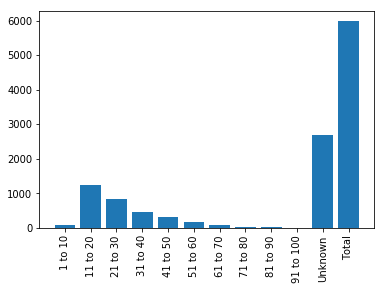

In [46]:
# Sous forme de diagramme en bâtons

import numpy as np
import matplotlib.pyplot as plt

# Make a fake dataset:
donnees = [dix.shape[0], vingt.shape[0], trente.shape[0], quarante.shape[0], cinquante.shape[0], 
               soixante.shape[0], soixante_dix.shape[0], quatre_vingt.shape[0], quatre_vingt_dix.shape[0], 
               cent.shape[0], unkn.shape[0], data.shape[0]]
bars = ('1 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 60', '61 to 70', 
                      '71 to 80', '81 to 90', '91 to 100', 'Unknown', 'Total')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, donnees)
plt.xticks(y_pos, bars, rotation=90)


# Create names on the x-axis
plt.xticks(y_pos, bars)


# Show graphic
plt.show()
